In [1]:
import matplotlib.pyplot as plt

In [2]:
inputs_raw = [(0.2, 1600), (1.0, 11000), (1.4, 23000), (1.6, 24000), (2.0, 30000),
    (2.2, 31000), (2.7, 35000), (2.8, 38000), (3.2, 40000), (3.3, 21000), (3.5, 45000),
    (3.7, 46000), (4.0, 50000), (4.4, 49000), (5.0, 60000), (5.2, 62000)]
targets = [230, 555, 815, 860, 1140, 1085, 1200, 1330, 1290,
    870, 1545, 1480, 1750, 1845, 1790, 1955]

In [3]:
ages = [x[0] for x in inputs_raw]
milages = [x[1] for x in inputs_raw]

min_age, max_age = min(ages), max(ages)
min_milage, max_milage = min(milages),max(milages)

inputs = [((age - min_age) / (max_age  - min_age), (milage - min_milage) / (max_milage - min_milage)) for age, milage in inputs_raw]

In [4]:
inputs

[(0.0, 0.0),
 (0.16, 0.15562913907284767),
 (0.24, 0.3543046357615894),
 (0.28, 0.3708609271523179),
 (0.36, 0.47019867549668876),
 (0.4, 0.4867549668874172),
 (0.5, 0.5529801324503312),
 (0.5199999999999999, 0.6026490066225165),
 (0.6, 0.6357615894039735),
 (0.6199999999999999, 0.3211920529801324),
 (0.6599999999999999, 0.7185430463576159),
 (0.7, 0.7350993377483444),
 (0.76, 0.8013245033112583),
 (0.8400000000000001, 0.7847682119205298),
 (0.96, 0.9668874172185431),
 (1.0, 1.0)]

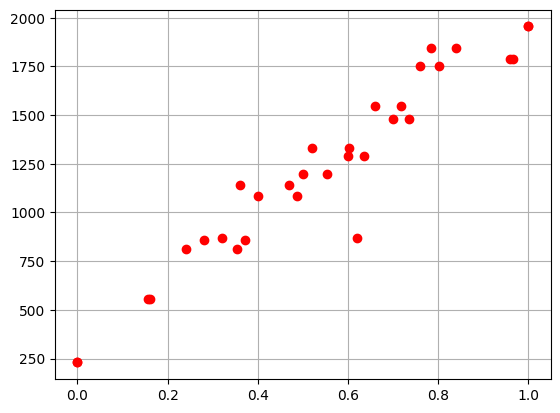

In [5]:
plt.plot(inputs, targets, 'ro')
plt.grid()
plt.show()

In [6]:
w1 = 0.1
w2 = 0.2
b = 0.3
epochs = 400
learning_rate = 0.1

def predict(i1, i2):
    return w1 * i1 + w2 * i2 + b

# train the network
for epoch in range(epochs):
    pred = [predict(i1, i2) for i1, i2 in inputs]
    cost = sum([(p - t) **2 for p, t in zip(pred, targets)]) / len(targets)
    print(f"ep: {epoch}, c: {cost:.2f}")

    errors_d = [2 * (p - t) for p, t in zip(pred, targets)]
    weight1_d = [e * i[0] for e, i in zip(errors_d, inputs)]
    weight2_d = [e * i[1] for e, i in zip(errors_d, inputs)]
    bias_d = [e * 1 for e in errors_d]
    w1 -= learning_rate * sum(weight1_d) / len(weight1_d)
    w2 -= learning_rate * sum(weight2_d) / len(weight2_d)
    b -= learning_rate * sum(bias_d) / len(bias_d)

x_vals = inputs
#y_vals = [w * x + b for x in x_vals]    

#print(f"w1: {w1:.4f}, w2: {w2:.4f}, b: {b:.4f}")

ep: 0, c: 1745123.13
ep: 1, c: 809207.06
ep: 2, c: 390622.90
ep: 3, c: 202967.83
ep: 4, c: 118411.33
ep: 5, c: 79898.09
ep: 6, c: 61961.82
ep: 7, c: 53235.27
ep: 8, c: 48644.06
ep: 9, c: 45922.48
ep: 10, c: 44058.47
ep: 11, c: 42599.50
ep: 12, c: 41342.85
ep: 13, c: 40197.29
ep: 14, c: 39121.37
ep: 15, c: 38095.91
ep: 16, c: 37111.68
ep: 17, c: 36163.91
ep: 18, c: 35249.85
ep: 19, c: 34367.68
ep: 20, c: 33515.99
ep: 21, c: 32693.60
ep: 22, c: 31899.43
ep: 23, c: 31132.50
ep: 24, c: 30391.85
ep: 25, c: 29676.56
ep: 26, c: 28985.76
ep: 27, c: 28318.61
ep: 28, c: 27674.27
ep: 29, c: 27051.98
ep: 30, c: 26450.96
ep: 31, c: 25870.49
ep: 32, c: 25309.85
ep: 33, c: 24768.36
ep: 34, c: 24245.36
ep: 35, c: 23740.22
ep: 36, c: 23252.30
ep: 37, c: 22781.03
ep: 38, c: 22325.83
ep: 39, c: 21886.14
ep: 40, c: 21461.42
ep: 41, c: 21051.17
ep: 42, c: 20654.88
ep: 43, c: 20272.06
ep: 44, c: 19902.27
ep: 45, c: 19545.04
ep: 46, c: 19199.94
ep: 47, c: 18866.56
ep: 48, c: 18544.48
ep: 49, c: 18233.33
ep: 

NameError: name 'y_vals' is not defined

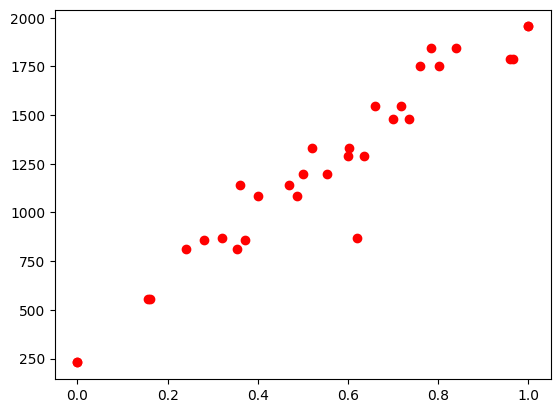

In [7]:
# Plot actual data
plt.plot(inputs, targets, 'ro', label='Actual Data')

# Plot regression line
plt.plot(x_vals, y_vals, 'b-', label=f'Learned Line: y = {w:.1f}x + {b:.1f}')

plt.plot([0, 0], [0, 2000], 'k--', lw=2)

plt.xlabel('Input')
plt.ylabel('Target')
plt.title('Linear Fit After Training')
plt.xlim([-1, 6])
plt.legend()
plt.grid(True)
plt.show()

In [56]:
test_inputs = [(0.1600, 0.1391), (0.5600, 0.3046),
    (0.7600, 0.8013), (0.9600, 0.3046), (0.1600, 0.7185)]
test_targets = [500, 850, 1650, 950, 1375]

In [57]:
pred = [predict(i1, i2) for i1, i2 in test_inputs]
for p, t in zip(pred, test_targets):
    print(f'target: {t}, predicted: {p}')

target: 500, predicted: 536.7063531447807
target: 850, predicted: 981.4441931056049
target: 1650, predicted: 1637.9819787937154
target: 950, predicted: 1252.5983942824596
target: 1375, predicted: 1144.4064154495047
